<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9728943	total: 53.3ms	remaining: 53.2s
1:	learn: 0.9404530	total: 53.7ms	remaining: 26.8s
2:	learn: 0.9128564	total: 54.2ms	remaining: 18s
3:	learn: 0.8819495	total: 54.6ms	remaining: 13.6s
4:	learn: 0.8568606	total: 54.9ms	remaining: 10.9s
5:	learn: 0.8287659	total: 55.4ms	remaining: 9.17s
6:	learn: 0.8060234	total: 55.7ms	remaining: 7.9s
7:	learn: 0.7828133	total: 56.2ms	remaining: 6.97s
8:	learn: 0.7571518	total: 56.6ms	remaining: 6.23s
9:	learn: 0.7329480	total: 56.9ms	remaining: 5.64s
10:	learn: 0.7101293	total: 57.4ms	remaining: 5.16s
11:	learn: 0.6871606	total: 57.8ms	remaining: 4.76s
12:	learn: 0.6684137	total: 58.3ms	remaining: 4.43s
13:	learn: 0.6495209	total: 59ms	remaining: 4.15s
14:	learn: 0.6291343	total: 59.3ms	remaining: 3.89s
15:	learn: 0.6107066	total: 59.8ms	remaining: 3.68s
16:	learn: 0.5915734	total: 60.3ms	remaining: 3.48s
17:	learn: 0.5744611	total: 65.8ms	remaining: 3.59s
18:	learn: 0.5577823	total: 66.1ms	remaining: 3.41s
19:	learn: 0.5422352	total:

196:	learn: 0.0403337	total: 148ms	remaining: 602ms
197:	learn: 0.0401683	total: 148ms	remaining: 601ms
198:	learn: 0.0400244	total: 152ms	remaining: 611ms
199:	learn: 0.0399196	total: 152ms	remaining: 609ms
200:	learn: 0.0397793	total: 153ms	remaining: 609ms
201:	learn: 0.0396443	total: 155ms	remaining: 611ms
202:	learn: 0.0395129	total: 158ms	remaining: 622ms
203:	learn: 0.0394198	total: 160ms	remaining: 625ms
204:	learn: 0.0392895	total: 161ms	remaining: 625ms
205:	learn: 0.0391892	total: 168ms	remaining: 646ms
206:	learn: 0.0391086	total: 169ms	remaining: 647ms


207:	learn: 0.0390114	total: 173ms	remaining: 658ms
208:	learn: 0.0388617	total: 177ms	remaining: 669ms
209:	learn: 0.0386937	total: 179ms	remaining: 673ms
210:	learn: 0.0385673	total: 182ms	remaining: 679ms
211:	learn: 0.0383045	total: 182ms	remaining: 678ms
212:	learn: 0.0382160	total: 188ms	remaining: 694ms
213:	learn: 0.0381054	total: 200ms	remaining: 736ms
214:	learn: 0.0380235	total: 201ms	remaining: 735ms
215:	learn: 0.0379531	total: 202ms	remaining: 734ms
216:	learn: 0.0378077	total: 206ms	remaining: 744ms
217:	learn: 0.0376977	total: 209ms	remaining: 748ms
218:	learn: 0.0375623	total: 210ms	remaining: 749ms
219:	learn: 0.0374399	total: 211ms	remaining: 749ms
220:	learn: 0.0373594	total: 213ms	remaining: 750ms
221:	learn: 0.0372666	total: 214ms	remaining: 749ms
222:	learn: 0.0371490	total: 223ms	remaining: 776ms
223:	learn: 0.0370596	total: 225ms	remaining: 778ms
224:	learn: 0.0369370	total: 231ms	remaining: 796ms
225:	learn: 0.0368067	total: 233ms	remaining: 799ms
226:	learn: 

255:	learn: 0.0332768	total: 260ms	remaining: 756ms
256:	learn: 0.0332222	total: 261ms	remaining: 754ms
257:	learn: 0.0331127	total: 262ms	remaining: 754ms
258:	learn: 0.0329268	total: 263ms	remaining: 752ms
259:	learn: 0.0328351	total: 263ms	remaining: 749ms
260:	learn: 0.0327492	total: 264ms	remaining: 746ms
261:	learn: 0.0326662	total: 264ms	remaining: 743ms
262:	learn: 0.0325798	total: 264ms	remaining: 740ms
263:	learn: 0.0324930	total: 266ms	remaining: 741ms
264:	learn: 0.0323602	total: 266ms	remaining: 738ms
265:	learn: 0.0322812	total: 267ms	remaining: 736ms
266:	learn: 0.0321148	total: 267ms	remaining: 733ms
267:	learn: 0.0319953	total: 267ms	remaining: 730ms
268:	learn: 0.0319198	total: 267ms	remaining: 727ms
269:	learn: 0.0318491	total: 268ms	remaining: 724ms
270:	learn: 0.0317689	total: 268ms	remaining: 721ms
271:	learn: 0.0316042	total: 268ms	remaining: 718ms
272:	learn: 0.0315287	total: 269ms	remaining: 715ms
273:	learn: 0.0314538	total: 270ms	remaining: 715ms
274:	learn: 

323:	learn: 0.0273000	total: 287ms	remaining: 600ms
324:	learn: 0.0272398	total: 288ms	remaining: 598ms
325:	learn: 0.0271582	total: 288ms	remaining: 595ms
326:	learn: 0.0270908	total: 288ms	remaining: 593ms
327:	learn: 0.0270091	total: 289ms	remaining: 593ms
328:	learn: 0.0269183	total: 290ms	remaining: 591ms
329:	learn: 0.0268531	total: 291ms	remaining: 590ms
330:	learn: 0.0268067	total: 291ms	remaining: 588ms
331:	learn: 0.0267447	total: 291ms	remaining: 586ms
332:	learn: 0.0266692	total: 291ms	remaining: 584ms
333:	learn: 0.0266224	total: 292ms	remaining: 582ms
334:	learn: 0.0265301	total: 292ms	remaining: 579ms
335:	learn: 0.0264549	total: 292ms	remaining: 577ms
336:	learn: 0.0264112	total: 292ms	remaining: 575ms
337:	learn: 0.0263570	total: 293ms	remaining: 573ms
338:	learn: 0.0262807	total: 293ms	remaining: 571ms
339:	learn: 0.0262308	total: 293ms	remaining: 569ms
340:	learn: 0.0261662	total: 293ms	remaining: 567ms
341:	learn: 0.0261291	total: 294ms	remaining: 565ms
342:	learn: 

596:	learn: 0.0178878	total: 381ms	remaining: 257ms
597:	learn: 0.0178686	total: 382ms	remaining: 257ms
598:	learn: 0.0178497	total: 382ms	remaining: 256ms
599:	learn: 0.0178269	total: 382ms	remaining: 255ms
600:	learn: 0.0178054	total: 385ms	remaining: 255ms
601:	learn: 0.0177844	total: 385ms	remaining: 255ms
602:	learn: 0.0177737	total: 385ms	remaining: 254ms
603:	learn: 0.0177607	total: 386ms	remaining: 253ms
604:	learn: 0.0177425	total: 386ms	remaining: 252ms
605:	learn: 0.0177225	total: 386ms	remaining: 251ms
606:	learn: 0.0177175	total: 386ms	remaining: 250ms
607:	learn: 0.0176941	total: 387ms	remaining: 249ms
608:	learn: 0.0176554	total: 387ms	remaining: 248ms
609:	learn: 0.0176401	total: 387ms	remaining: 248ms
610:	learn: 0.0176308	total: 387ms	remaining: 247ms
611:	learn: 0.0176090	total: 388ms	remaining: 246ms
612:	learn: 0.0175856	total: 388ms	remaining: 245ms
613:	learn: 0.0175729	total: 388ms	remaining: 244ms
614:	learn: 0.0175628	total: 389ms	remaining: 243ms
615:	learn: 

696:	learn: 0.0162872	total: 414ms	remaining: 180ms
697:	learn: 0.0162713	total: 415ms	remaining: 179ms
698:	learn: 0.0162613	total: 415ms	remaining: 179ms
699:	learn: 0.0162260	total: 416ms	remaining: 178ms
700:	learn: 0.0162056	total: 417ms	remaining: 178ms
701:	learn: 0.0162030	total: 417ms	remaining: 177ms
702:	learn: 0.0161976	total: 418ms	remaining: 177ms
703:	learn: 0.0161860	total: 418ms	remaining: 176ms
704:	learn: 0.0161795	total: 419ms	remaining: 175ms
705:	learn: 0.0161691	total: 419ms	remaining: 174ms
706:	learn: 0.0161659	total: 419ms	remaining: 174ms
707:	learn: 0.0161551	total: 420ms	remaining: 173ms
708:	learn: 0.0161239	total: 420ms	remaining: 172ms
709:	learn: 0.0161142	total: 420ms	remaining: 172ms
710:	learn: 0.0161016	total: 420ms	remaining: 171ms
711:	learn: 0.0160760	total: 421ms	remaining: 170ms
712:	learn: 0.0160609	total: 421ms	remaining: 170ms
713:	learn: 0.0160459	total: 421ms	remaining: 169ms
714:	learn: 0.0160412	total: 422ms	remaining: 168ms
715:	learn: 

771:	learn: 0.0153442	total: 489ms	remaining: 144ms
772:	learn: 0.0153292	total: 489ms	remaining: 144ms
773:	learn: 0.0153076	total: 496ms	remaining: 145ms
774:	learn: 0.0152802	total: 499ms	remaining: 145ms
775:	learn: 0.0152658	total: 503ms	remaining: 145ms
776:	learn: 0.0152537	total: 503ms	remaining: 144ms
777:	learn: 0.0152444	total: 504ms	remaining: 144ms
778:	learn: 0.0152372	total: 505ms	remaining: 143ms
779:	learn: 0.0152288	total: 507ms	remaining: 143ms
780:	learn: 0.0152130	total: 507ms	remaining: 142ms
781:	learn: 0.0151999	total: 507ms	remaining: 141ms
782:	learn: 0.0151875	total: 509ms	remaining: 141ms
783:	learn: 0.0151759	total: 509ms	remaining: 140ms
784:	learn: 0.0151652	total: 510ms	remaining: 140ms
785:	learn: 0.0151591	total: 511ms	remaining: 139ms
786:	learn: 0.0151455	total: 511ms	remaining: 138ms
787:	learn: 0.0151314	total: 512ms	remaining: 138ms
788:	learn: 0.0151183	total: 512ms	remaining: 137ms
789:	learn: 0.0151097	total: 513ms	remaining: 136ms
790:	learn: 

838:	learn: 0.0144624	total: 532ms	remaining: 102ms
839:	learn: 0.0144521	total: 537ms	remaining: 102ms
840:	learn: 0.0144479	total: 538ms	remaining: 102ms
841:	learn: 0.0144387	total: 538ms	remaining: 101ms
842:	learn: 0.0144265	total: 538ms	remaining: 100ms
843:	learn: 0.0144141	total: 538ms	remaining: 99.5ms
844:	learn: 0.0144040	total: 539ms	remaining: 98.8ms
845:	learn: 0.0143990	total: 539ms	remaining: 98.1ms
846:	learn: 0.0143774	total: 539ms	remaining: 97.4ms
847:	learn: 0.0143629	total: 546ms	remaining: 97.9ms
848:	learn: 0.0143436	total: 546ms	remaining: 97.2ms
849:	learn: 0.0143345	total: 547ms	remaining: 96.5ms
850:	learn: 0.0143266	total: 547ms	remaining: 95.8ms
851:	learn: 0.0143167	total: 547ms	remaining: 95.1ms
852:	learn: 0.0143042	total: 547ms	remaining: 94.3ms
853:	learn: 0.0142955	total: 548ms	remaining: 93.7ms
854:	learn: 0.0142863	total: 548ms	remaining: 93ms
855:	learn: 0.0142665	total: 548ms	remaining: 92.2ms
856:	learn: 0.0142599	total: 549ms	remaining: 91.5ms


992:	learn: 0.0128985	total: 637ms	remaining: 4.49ms
993:	learn: 0.0128813	total: 640ms	remaining: 3.86ms
994:	learn: 0.0128746	total: 641ms	remaining: 3.22ms
995:	learn: 0.0128689	total: 642ms	remaining: 2.58ms
996:	learn: 0.0128596	total: 642ms	remaining: 1.93ms
997:	learn: 0.0128544	total: 642ms	remaining: 1.29ms
998:	learn: 0.0128449	total: 643ms	remaining: 643us
999:	learn: 0.0128404	total: 643ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.023280476181997176
ABC Pre-generator MAE 0.9986393363755186


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

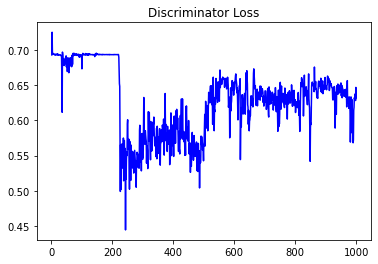

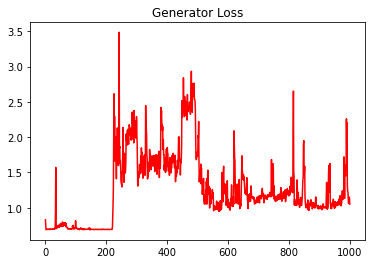

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.08247762201765141


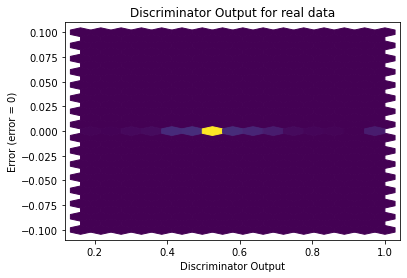

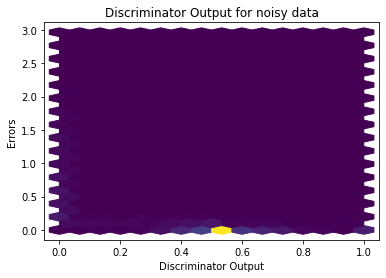

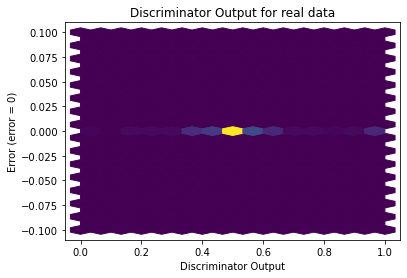

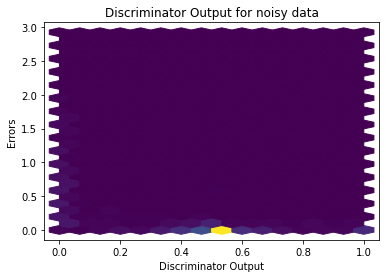

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())